In [140]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

## 

## PREPROCESSING

In [141]:
mnsit = fetch_openml("mnist_784")

In [142]:
x,y=mnsit['data'],mnsit['target']

In [143]:
random_example=x.iloc[6999]
random_example_img = random_example.values.reshape(28, 28)

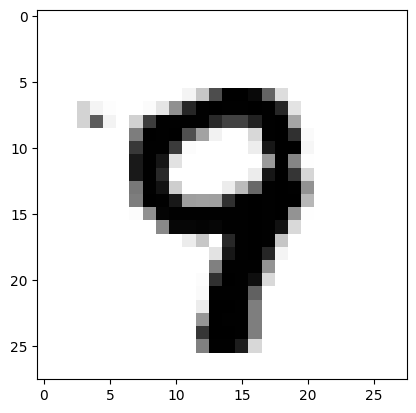

In [144]:
plt.imshow(random_example_img,cmap=matplotlib.cm.binary,interpolation='nearest')

In [145]:
y[6999]

'9'

In [146]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [147]:
x_train,x_test=x_train/255,x_test/255

## 

## MODEL_CREATION

In [148]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(max_iter=100000)

In [149]:
clf.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [150]:
clf.predict([random_example])

/Users/shivaram/Documents/Shiva/Personal_Docs/Amity_Docs/NTCC/CNN/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['9'], dtype=object)

## 

## MODEL_EVALUATION

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

y_pred=clf.predict(x_test)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.9211342264273812
Recall: 0.9209384847062296


In [152]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf,x_test,y_test,cv=3,scoring="accuracy")

array([0.90058279, 0.90588034, 0.90416595])

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {accuracy_scores}")
print(f"Mean accuracy: {accuracy_scores.mean()}")